In [57]:
# IMPORT STATEMENTS
import re
import numpy as np
from matplotlib import pyplot as plt
get_ipython().magic('matplotlib inline')
import pandas as pd
from collections import Counter
import os
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path.append("BoNE")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [58]:
import bone
reload(bone)
class MacAnalysis(bone.MacAnalysis):

    def getPGhs0(self, tn=1):
        self.prepareData("SS29","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        atypes = ['MDA-MB-231_GIV_KO_0_FBS','MDA-MB-231_parental_0_FBS']
        ahash = {'MDA-MB-231_GIV_KO_0_FBS':0,'MDA-MB-231_parental_0_FBS': 1}
        #atypes = ['MDA-MB-231_parental_10_FBS', 'MDA-MB-231_GIV_KO_10_FBS']
        #ahash = {'MDA-MB-231_parental_10_FBS': 0, 'MDA-MB-231_GIV_KO_10_FBS':1}
        self.initData(atype, atypes, ahash)
        
    def getPGhs10(self, tn=1):
        self.prepareData("SS29","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        #atypes = ['MDA-MB-231_parental_0_FBS', 'MDA-MB-231_GIV_KO_0_FBS']
        #ahash = {'MDA-MB-231_parental_0_FBS': 0, 'MDA-MB-231_GIV_KO_0_FBS':1}
        atypes = ['MDA-MB-231_GIV_KO_10_FBS', 'MDA-MB-231_parental_10_FBS']
        ahash = {'MDA-MB-231_GIV_KO_10_FBS':0, 'MDA-MB-231_parental_10_FBS':1}
        self.initData(atype, atypes, ahash)
        

        
    def getPGhsWT(self, tn=1):
        self.prepareData("SS29","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        atypes = ['MDA-MB-231_parental_10_FBS', 'MDA-MB-231_parental_0_FBS']
        ahash = {'MDA-MB-231_parental_10_FBS':0,'MDA-MB-231_parental_0_FBS': 1}
        #atypes = ['MDA-MB-231_parental_10_FBS', 'MDA-MB-231_GIV_KO_10_FBS']
        #ahash = {'MDA-MB-231_parental_10_FBS': 0, 'MDA-MB-231_GIV_KO_10_FBS':1}
        self.initData(atype, atypes, ahash)
        
    def getPGhsKO(self, tn=1):
        self.prepareData("SS29","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        #atypes = ['MDA-MB-231_parental_0_FBS', 'MDA-MB-231_GIV_KO_0_FBS']
        #ahash = {'MDA-MB-231_parental_0_FBS': 0, 'MDA-MB-231_GIV_KO_0_FBS':1}
        atypes = ['MDA-MB-231_GIV_KO_10_FBS', 'MDA-MB-231_GIV_KO_0_FBS']
        ahash = {'MDA-MB-231_GIV_KO_10_FBS':0, 'MDA-MB-231_GIV_KO_0_FBS':1}
        self.initData(atype, atypes, ahash)       
        
    def getPGhsall(self, tn=1):
        self.prepareData("SS29","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        #atypes = ['MDA-MB-231_parental_0_FBS', 'MDA-MB-231_GIV_KO_0_FBS']
        #ahash = {'MDA-MB-231_parental_0_FBS': 0, 'MDA-MB-231_GIV_KO_0_FBS':1}
        atypes = ['MDA-MB-231_parental_10_FBS', 'MDA-MB-231_parental_0_FBS', 'MDA-MB-231_GIV_KO_10_FBS', 'MDA-MB-231_GIV_KO_0_FBS']
        ahash = {'MDA-MB-231_parental_10_FBS':0, 'MDA-MB-231_parental_0_FBS':1, 'MDA-MB-231_GIV_KO_10_FBS':2, 'MDA-MB-231_GIV_KO_0_FBS':3}
        self.initData(atype, atypes, ahash)   
    
def plotViolinBar(ana, desc=None):
    fig = plt.figure(figsize=(5,5), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

def processDataDf(ana, l1, wt1, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)

    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig


def getOrder(ana, l1):
    from scipy.stats import fisher_exact, ttest_ind
    res = []
    for s in l1:
        for gn in s:
            id1 = ana.h.getBestID(ana.h.getIDs(gn).keys())
            if id1 is None:
                continue
            e = ana.h.getExprData(id1)
            v1 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[0]])
            v2 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[1]])
            t, p = ttest_ind(v1,v2,equal_var=False)
            res += [[id1, ana.h.getSimpleName(id1),
                   t, p, np.mean(v1)-np.mean(v2)]]
    return pd.DataFrame(res, columns=['ProbeID', 'Name', 'T', 'p', 'Diff'])
def plotVolcano(ana, genes, cfile, ylim=[0, 10.5], xlim=[-6, 6]):
    df = processGenes(ana.h, [ana.state[0], ana.state[1]], genes)
    df['Size'] = 10
    fig,ax = plt.subplots(figsize=(6,4), dpi=100)
    crcdf = pd.read_csv(cfile)
    crcdf['logp'] = -np.log10(crcdf['pvalue'])
    ax = sns.scatterplot('log2FoldChange', 'logp', size=0.1, color='0.8',
                         edgecolor="none", data=crcdf)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.legend().set_visible(False)
    import io
    import base64
    buffer = io.BytesIO()
    fig.savefig(buffer, format='jpg')
    buffer.seek(0)
    volcano = base64.b64encode(buffer.read())
    from PIL import Image, ImageDraw
    buffer.seek(0)
    img = Image.open(buffer)
    x = list(ax.bbox.bounds)
    x[2] = x[2] + x[0]
    x[3] = x[3] + x[1] - 2
    x[1] = x[1] - 2
    img = img.crop(x)

    fig,ax = plt.subplots(figsize=(6,4), dpi=100)
    ax = sns.scatterplot('Diff', 'logp', hue='Diff', palette='vlag',
                         data=df, size='Size', size_norm=(0, 10), 
                         edgecolor="none", zorder=2, ax=ax)
    ax.legend().set_visible(False)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    for i in df.index:
        ax.text(df['Diff'][i]+.02, df['logp'][i], str(df['Name'][i]))
    ax.imshow(img,
              aspect = ax.get_aspect(),
              extent = ax.get_xlim() + ax.get_ylim(),
              zorder = 1) #put the map under the heatmap
    return ax

def savePList(ofile, ana, l1):
    df = getOrder(ana, l1)
    df1 = df.sort_values(by=['T'], ascending=True)
    bone.saveList(ofile, df1['Name'])

def getSViP():
    l1 = [bone.readList("/booleanfs2/sahoo/Data/Macrophage/BN/covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("/booleanfs2/sahoo/Data/Macrophage/BN/covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

# Composite score of various signature on our system 

GIV

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
12 3 3 3 SS29
[1]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[1]


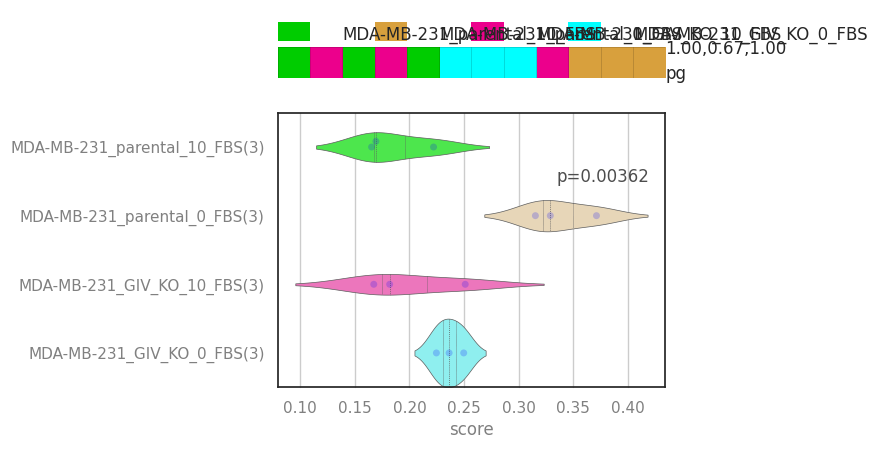

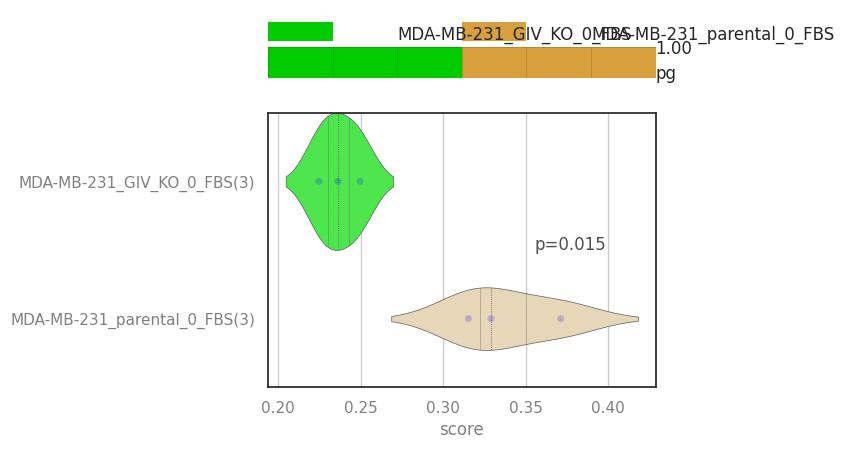

In [61]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [['CCDC88A']]

ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

normal stem cell

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
12 3 3 3 SS29
[6]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[6]


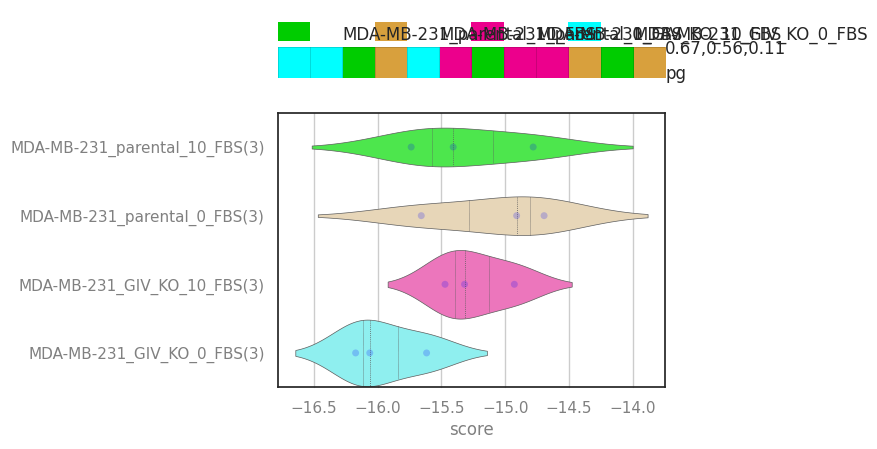

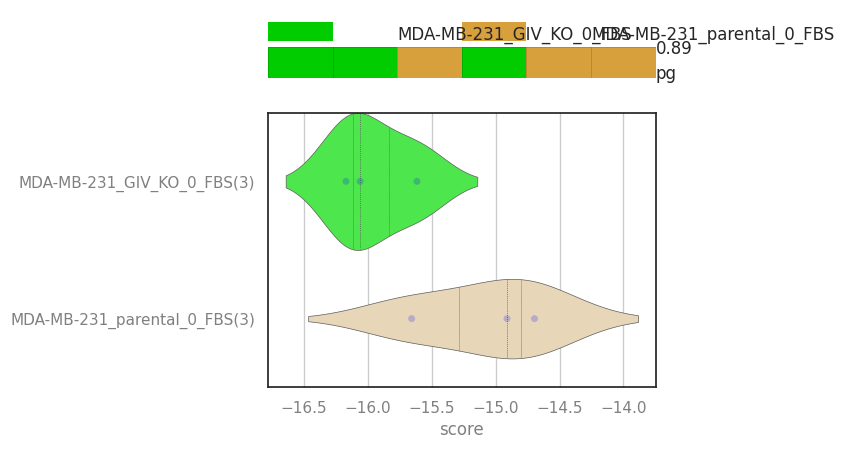

In [66]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 =[1], [['ZSCAN4', 'CD44', 'CD34', 'ABCG2', 'PROM1', 'ZFPR42', 'NANOG']]
#normal stem cell

ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

cancer stem cell

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
12 3 3 3 SS29
[10]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[10]


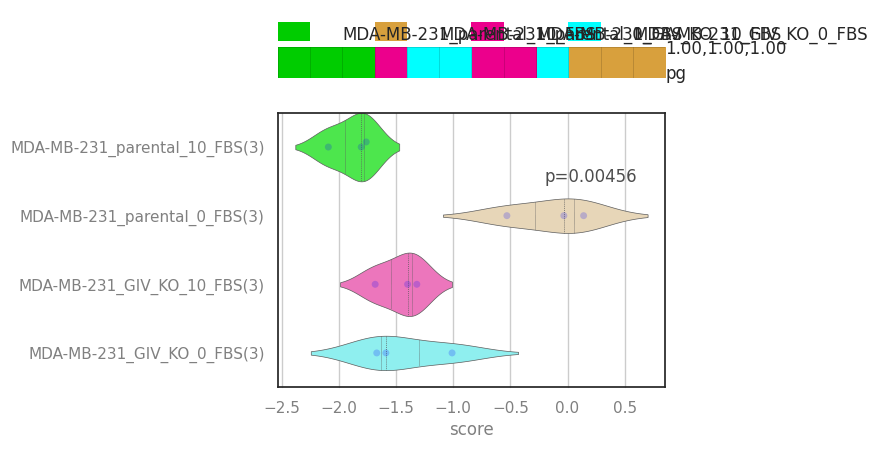

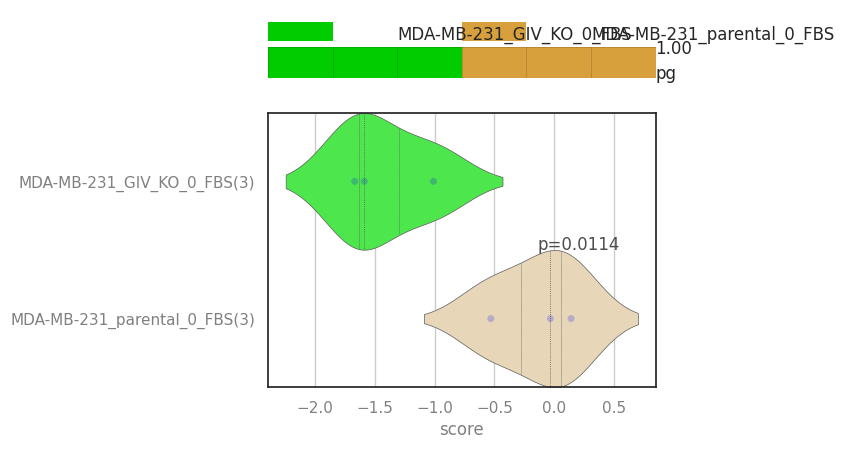

In [63]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 =[1], [['KDM5B', 'CTNNB1', 'NOTCH1', 'HIF1A', 'TWIST1', 'NES', 'EZH2', 'EPAS1', 'BMI1', 'LGR5']]
#cancer stem cell

ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

Yamanaka factor

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
12 3 3 3 SS29
[10]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[10]


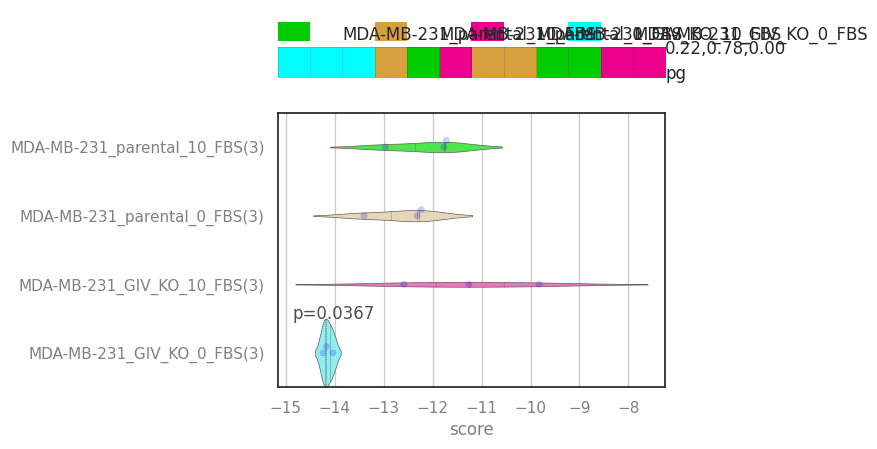

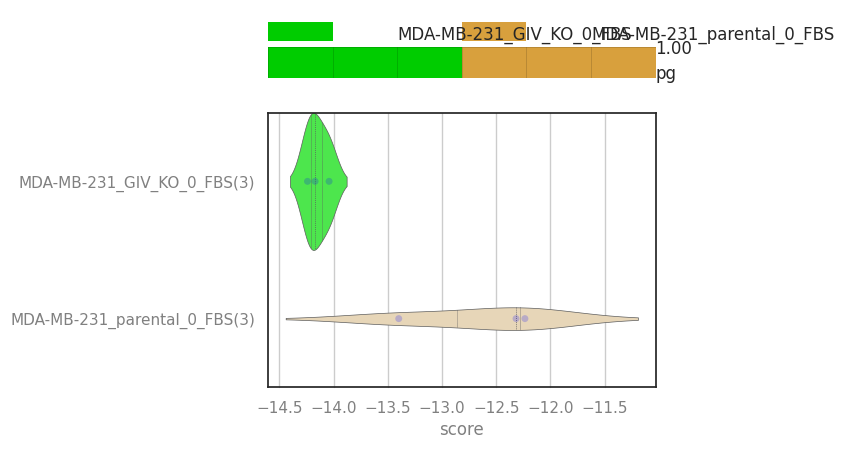

In [64]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 =[1], [['KLF4', 'MYC', 'SOX2', 'POU5F1']]
#Yamanaka factor

ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

PMID: 29625051

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
12 3 3 3 SS29
[647, 323]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[647, 323]


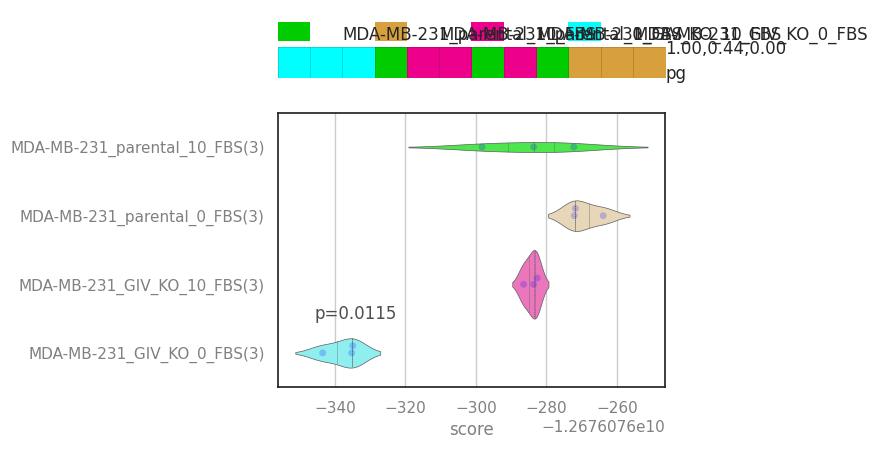

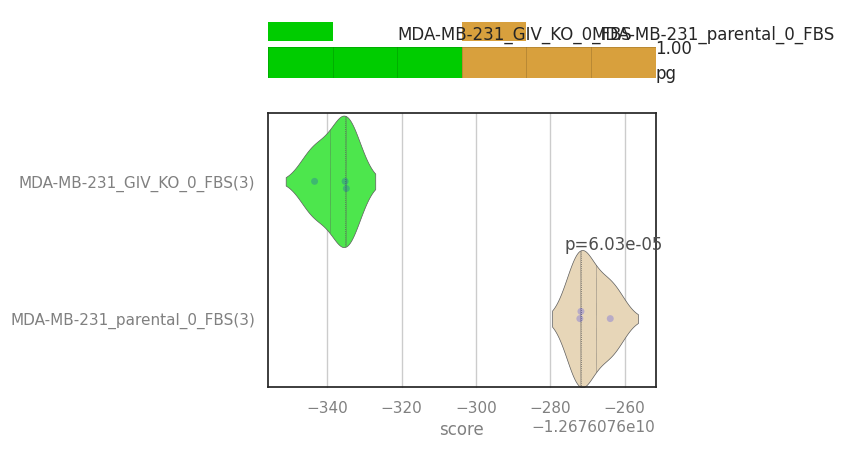

In [67]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("TCGAnalyze.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

Veridex

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
12 3 3 3 SS29
[84]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[84]


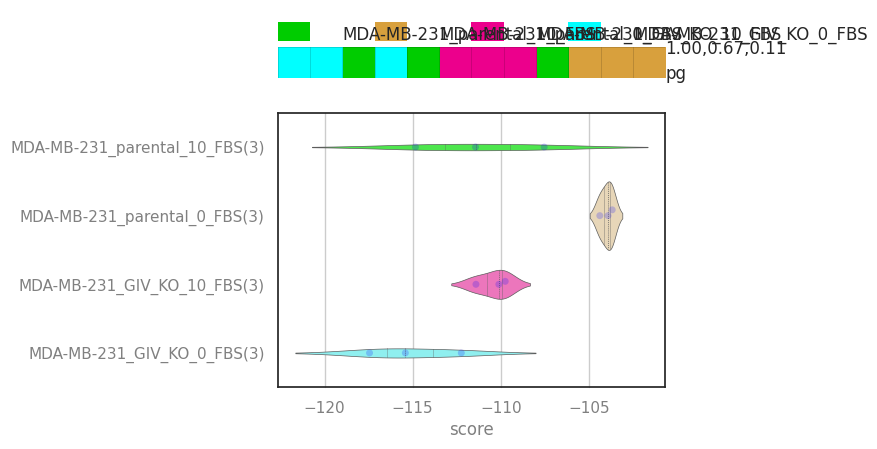

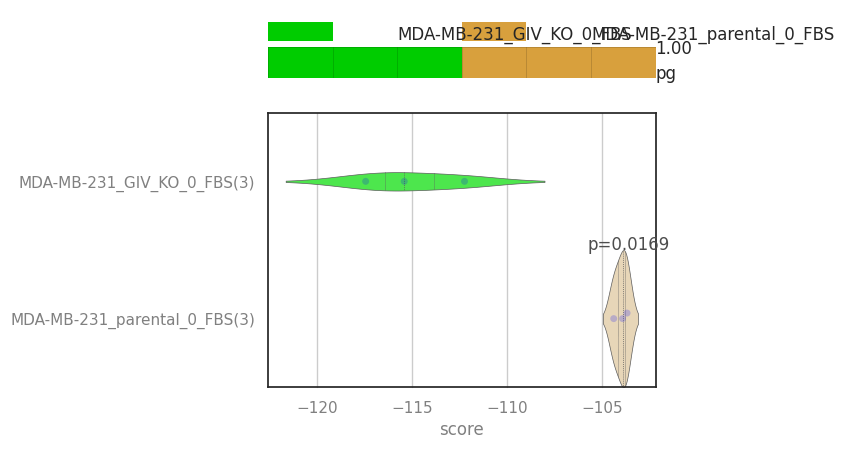

In [51]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("veridex2.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[8]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[8]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[8]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[8]


NameError: name 'sns' is not defined

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]


ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)
ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [ ]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = bone.getSViP()
#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]

#wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]

#wt1, l1 = [1], [['KI67', 'STK15', 'SURVIVIN', 'CCNB1', 'MYBL2', 'MMP11', 'CTSL2', 'GRB2', 'HER2', 'ER', 'PGR', 'BCL2', 'SCUBE2', 'CD68', 'BAG1', 'GSTM1', 'ACTB', 'GAPDH', 'RPLPO', 'GUS', 'TFRC']]
#OncotypeDX

#wt1, l1 = [1], [['ADGRL4','CCN4','CDKN2A','COL11A1','COL1A2','CXCL5','EDIL3','GREM1','HAPLN1','LINC01436','LUM','MMP1','MMP3','MYL9','NRN1','PDGFRA','PLS3','POSTN','PTN','ROR1','SPARC','TCEAL9','TMEFF2']]
#co-culture_sig2

#wt1, l1 = [1], [['HOXB13' ,'IL17BR' ,'BUB1B' ,'CENPA' ,'NEK2' ,'RACGAP1' ,'RRM2']]
#BCI

#wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("veridex2.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("7gene_sig.txt", 0)]
#7 gene/34604089

#wt1, l1 = [1], [bone.getEntries("brCA stem cells.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("BrCA_stemcell_32.txt", 0)]

#wt1, l1 = [1], [['PSMB9', 'CXCL13', 'NPR3', 'CDKN2C']]
#Stemness [PMID:33110086]


#cfile = 'BREAST_CANCER_PROGENITOR_sig.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:432], l1[434:]]

#cfile = 'CNCL.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:7], l1[10:]]

#wt1, l1 = [1], [['AURKB', 'BUB1', 'CENPA', 'KIF4A', 'KIFC1', 'NCAPG', 'PLK1', 'RAD54L']]
#8 gene sig

#wt1, l1 = [1], [bone.getEntries("mSigDB.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Miranda.txt", 0)]

#wt1, l1 = [1], [['CCDC88A']]


#cfile = 'ALDEFLUOR.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:28], l1[30:]]


#cfile = 'TCGAnalyze.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:601], l1[605:]]

wt1, l1 =[1], [['KDM5B', 'CTNNB1', 'NOTCH1', 'HIF1A', 'TWIST1', 'NES', 'EZH2', 'EPAS1', 'BMI1', 'LGR5']]
#cancer stem cell

#wt1, l1 =[1], [['ZSCAN4', 'CD44', 'CD34', 'ABCG2', 'PROM1', 'ZFPR42', 'NANOG']]
#normal stem cell

#wt1, l1 =[1], [['KLF4', 'MYC', 'SOX2', 'POU5F1']]
#Yamanaka factor

#wt1, l1 =[1], [['CDH1','TJP1','TJP2']]

#wt1, l1 = [1], [bone.getEntries("late.txt", 0)]

#wt1, l1 =[1], [['RN7SL2', 'HMCN2', 'HBA2', 'DNAH9', 'HELLPAR', 'DUX4L26']]
#up_in_ctc_deg_CAMPO

#wt1, l1 =[3,-1], [['B2M','CD47','CD274', 'CD24','HLA-A'],['CALR']] #Dont eat me

#wt1, l1 =[1], [['B2M','CD47','CD274', 'CD24','HLA-A']] #Dont eat me


#wt1, l1 =[1], [['PVR', 'VEGFA', 'CD44', 'ADGRE5']] #platelets

#wt1, l1 =[1], [['PVR', 'TNFRSF10B', 'MAP1LC3B']] #NK CELL

#wt1, l1 =[1], [['CDX1']] 

#cfile = 'CTC_CTCcl_DEG.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:41], l1[43:]]

#wt1, l1 = [1], [bone.getEntries("cell_cycle_asig.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("biocarta.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("936_EMT.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("CAMPO_DEG_UP.txt", 0)]


#wt1, l1 = [1], [bone.getEntries("TIGHT_JUNCTION.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Maheswaran_SC_CL.txt", 0)]
#wt1, l1 = [1], [bone.getEntries("Maheswaran_sc_cl_short.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Veer_CTC_PMID22384245.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("stromal_activation_PT_25060555.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("128_EMP.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("EM2_dn.txt", 0)]

#wt1, l1 = [1], [['VCAM1', 'ITGB1', 'ICAM1']]

###############################################

#wt1, l1 = [1], [['CCDC88A']]


#cfile = 'log5p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]


#wt1, l1 = [1], [bone.getEntries("early.txt", 0)]

#wt1, l1 = [1], [['AZGP1', 'BIRC5', 'DHCR7', 'IL6ST', 'MGP', 'RBBP8', 'STC2', 'UBE2C']]#endo predict

#wt1, l1 = [1], [['CTNNA1', 'JUP', 'CDH1', 'VIM', 'CDH2', 'ZEB2', 'GEMIN2', 'SNAI2', 'TCF3', 'TWIST1', 'FOXC2', 'FN1', 'SNAI1']]

#wt1, l1 = [1], [['CXCL9', 'CXL10', 'CXCL11', 'TAP1', 'PSMB9']]#TIS-5 gene signature

#wt1, l1 = [1], [['CXCL9', 'CD276', 'HLA-DQA1', 'CD274', 'IDO1', 'HLA-DRB1', 'HLA-E', 'CMKLR1', 'PDCD1LG2', 'PSMB10', 'LAG3', 'STAT1', 'CD8A', 'CCL5', 'NKG7', 'TIGIT', 'CD27', 'CXCR6']]#TIS-18 gene signature


#wt1, l1 = [1], [['ACOT2', 'AFAP1-AS1', 'AGR2', 'AL845454.2', 'ALDH3A1', 'ASCL2', 'BMP2', 'CACNG4', 'CBR1', 'CST7', 'CXCL5', 'DDX3Y', 'FAM84A', 'FOXA2', 'FOXQ1', 'GPRIN2', 'GSTM3', 'IGFBP4', 'KIT', 'LEF1', 'LIPG', 'MUC13', 'MUC5AC', 'NNT', 'OLR1', 'PDZK1IP1', 'PKDCC', 'PRSS2', 'PSMB8', 'S100P', 'SCCPDH', 'SELENBP1', 'SH3RF3', 'SORBS2', 'TACSTD2', 'TFF1', 'TFF3', 'TIMP3', 'TLE4', 'TMEM45B', 'TMEM52B', 'TXNIP', 'UGT1A6']]
#DEG_S_R_PDO

#wt1, l1 = [1], [['PGR' ,'SCGB2A1' ,'PIP' ,'MGP' ,'EFHD1' ,'SERPINA3' ,'WFDC2' ,'AGR2' ,'MUC16' ,'TMPRSS4' ,'FAT1' ,'FAT2' ,'SFRP1' ,'SFRP2' ,'CXCL13' ,'CXCL14' ,'PRAME']]

#ana.getPGhshm()
ana.getPGhsall()
fig = processData(ana, l1, wt1, desc=None, violin=1)

ana.getPGhs0()
#ana.getPGhsKO()
#ana.getPGhsWT()



fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

# Composite score of Autonomy signture on various datasets

FinaDV (n = 46)
GSE188899 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB60
22 6 4 3 TNB60
[2, 35]


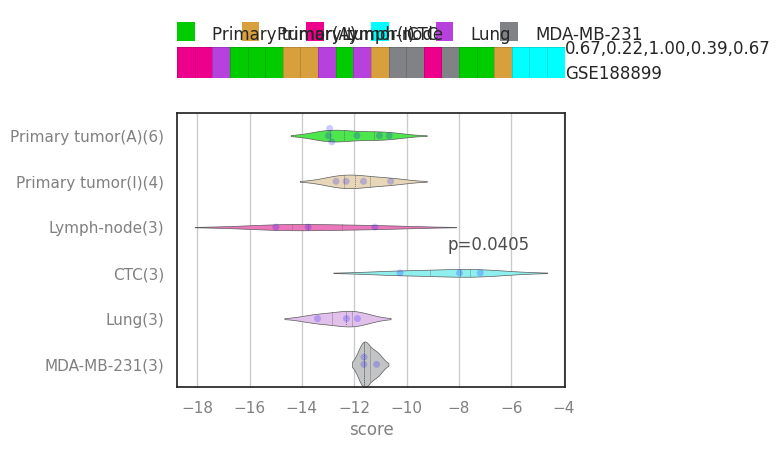

In [37]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]

ana.getFINADV()



fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

Sarioglu2019 (n = 17)
GSE67939 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB65
17 2 15 0 TNB65
[0, 12]


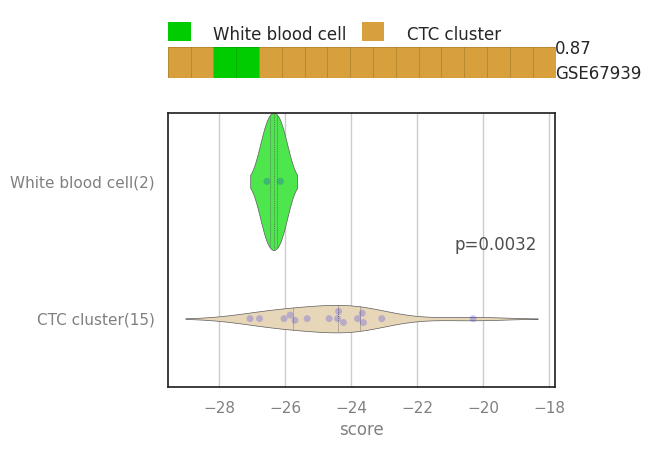

In [38]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]

ana.getSarioglu2019()



fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

Molloy 2012 (n = 144)
GSE31364 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB39
72 41 31 0 TNB39
[1, 23]


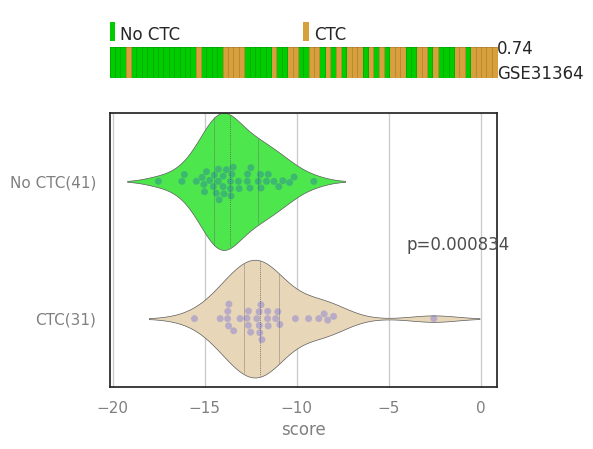

In [39]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]

ana.getMolloy()


fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)


Francesc2022 (n = 306)
GSE180097 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB47
143 48 60 35 TNB47
[1, 18]
Francesc2022 (n = 306)
GSE180097 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB47
139 60 56 23 TNB47
[1, 18]


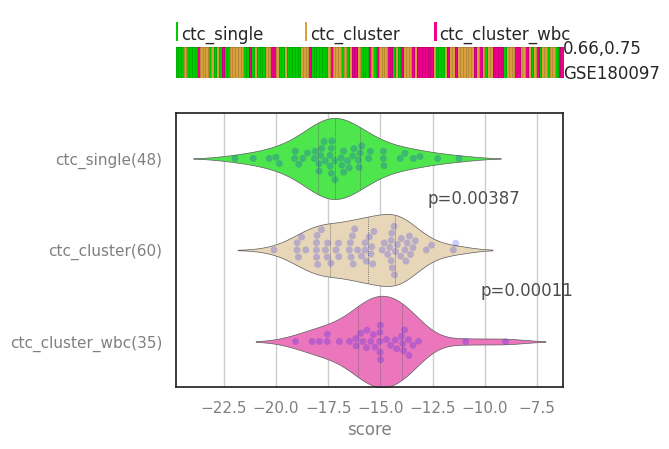

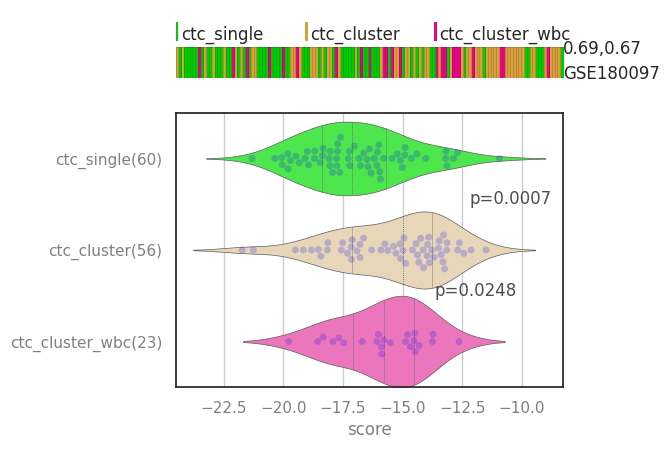

In [40]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]

ana.getFrancesc2()#resting
fig = processData(ana, l1, wt1, desc=None, violin=1)


ana.getFrancesc3()#active
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

Bardia 2012 (n = 30)
GSE41245 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB20
5 1 1 1 TNB20
[1, 20]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


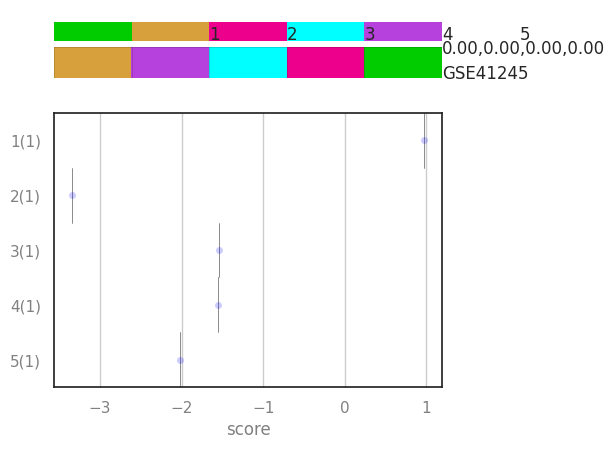

In [41]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]

ana.getbardia1()


fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)